In [1]:
# https://towardsdatascience.com/audio-classification-with-pre-trained-vgg-19-keras-bca55c2a0efe
#https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8

In [172]:
from pydub import AudioSegment
from scipy.io.wavfile import read
import librosa
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import os
import sklearn
import csv
import youtube_dl

# PyDUB

In [75]:
sound = AudioSegment.from_mp3('Dataset/TringTring/1.mp3')
sound.export("Dataset/TringTring/1.wav", format="wav")

<_io.BufferedRandom name='Dataset/TringTring/1.wav'>

In [76]:
audio = read("Dataset/TringTring/1.wav")

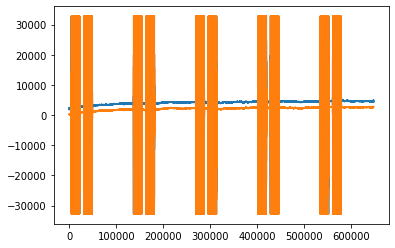

In [77]:
plt.plot(audio[1])

# Librosa

In [266]:
audio_path_base = 'Dataset/TringTring'
audio_paths = []
files = os.listdir(audio_path_base)
files.remove('.ipynb_checkpoints')
for path in files:
    audio_paths.append(os.path.join(audio_path_base, path))
audio_paths

['Dataset/TringTring/7.mp3',
 'Dataset/TringTring/6.mp3',
 'Dataset/TringTring/4.mp3',
 'Dataset/TringTring/5.mp3',
 'Dataset/TringTring/1.mp3',
 'Dataset/TringTring/2.mp3',
 'Dataset/TringTring/3.mp3',
 'Dataset/TringTring/21.mp3',
 'Dataset/TringTring/20.mp3',
 'Dataset/TringTring/18.mp3',
 'Dataset/TringTring/19.mp3',
 'Dataset/TringTring/17.mp3',
 'Dataset/TringTring/16.mp3',
 'Dataset/TringTring/14.mp3',
 'Dataset/TringTring/15.mp3',
 'Dataset/TringTring/11.mp3',
 'Dataset/TringTring/10.mp3',
 'Dataset/TringTring/12.mp3',
 'Dataset/TringTring/13.mp3',
 'Dataset/TringTring/23.wav',
 'Dataset/TringTring/22.wav',
 'Dataset/TringTring/8.mp3',
 'Dataset/TringTring/9.mp3']

In [149]:
x , sr = librosa.load(audio_paths[11], sr=44100)

/Users/mayank.gupta/venv/audio/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [150]:
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [151]:
print(x.shape, sr)

(1523344,) 44100


In [152]:
#librosa.load(audio_path, sr=44100)
#librosa.load(audio_path, sr=None)

In [153]:
ipd.Audio(audio_paths[11])


## Waveform

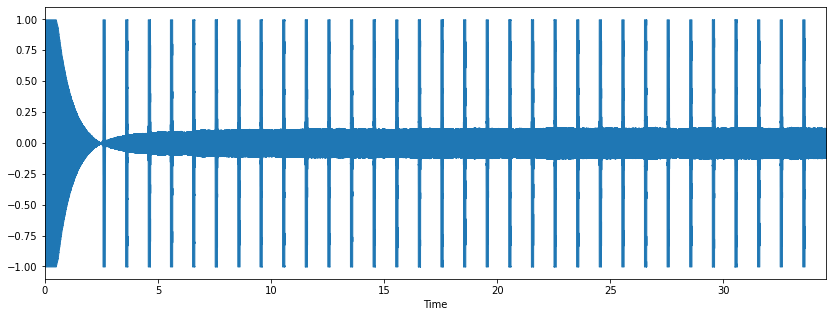

In [154]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

## Spectogram

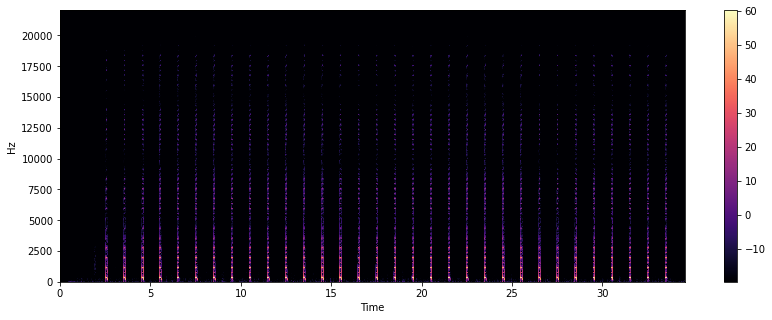

In [160]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

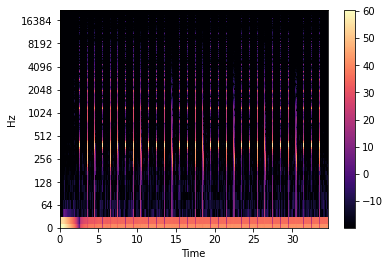

In [161]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Writing Wav

In [119]:
#librosa.output.write_wav('Dataset/Experiments/tringtring1.wav', x, sr)
#ipd.Audio('Dataset/Experiments/tringtring1.wav')

## Creating audio signal

In [120]:
# sr = 22050 # sample rate
# T = 5.0    # seconds
# t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
# x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
# # Playing the audio
# ipd.Audio(x, rate=sr) # load a NumPy array

In [121]:
# Saving the audio
librosa.output.write_wav('Dataset/Experiments/tone_220.wav', x, sr)

## Zero crossing rate

/Users/mayank.gupta/venv/audio/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


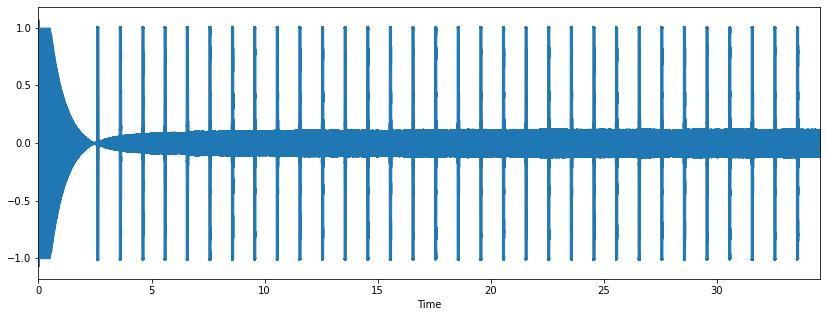

In [162]:
# Load the signal
x, sr = librosa.load(audio_paths[11])
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

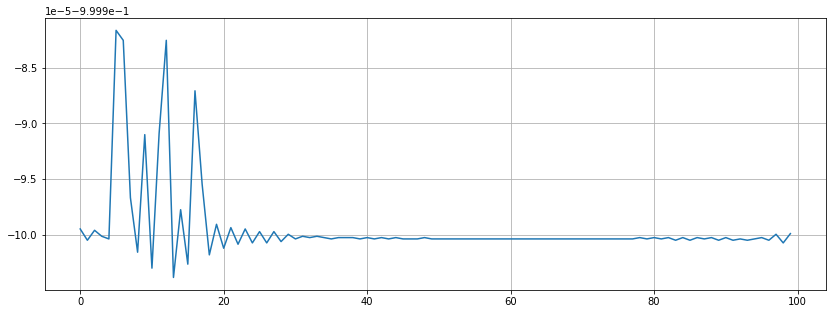

In [163]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [165]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

0


## Spectral centroids

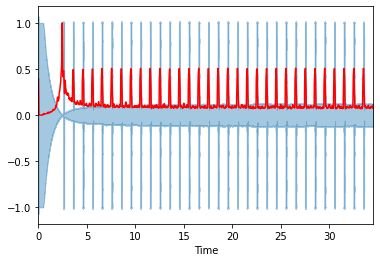

In [166]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

In [169]:
np.mean(spectral_centroids)

412.6502642068184

## Spectral rolloff

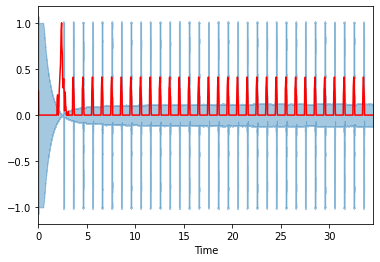

In [171]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

## Mel-Frequency Cepstral Coefficients

/Users/mayank.gupta/venv/audio/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


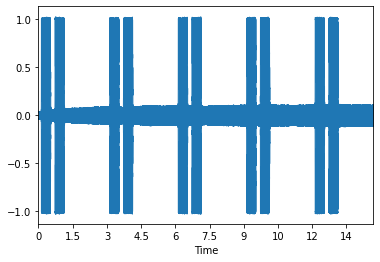

In [128]:
x, fs = librosa.load(audio_path)
librosa.display.waveplot(x, sr=sr)

(20, 633)


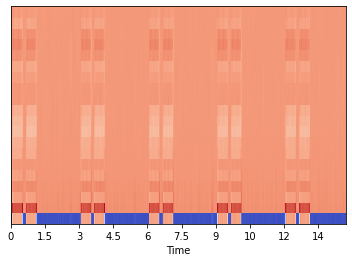

In [129]:
mfccs = librosa.feature.mfcc(x, sr=fs)
print (mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

[ 2.4105512e-08  6.0263781e-09  0.0000000e+00 -9.0395673e-09
 -1.2052756e-08  0.0000000e+00  0.0000000e+00  1.2052756e-08
  0.0000000e+00  6.0263781e-09 -1.2052756e-08  0.0000000e+00
 -1.5065945e-09  0.0000000e+00 -1.8079135e-08 -6.0263781e-09
 -6.0263781e-09  3.0131890e-09  0.0000000e+00  0.0000000e+00]
[1.        0.9999999 1.        1.        1.        1.        1.
 1.0000001 0.9999999 1.        1.        1.        0.9999999 0.9999999
 1.        0.9999999 1.        0.9999999 1.0000001 1.0000001]


/Users/mayank.gupta/venv/audio/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/mayank.gupta/venv/audio/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


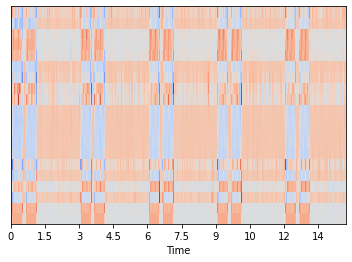

In [130]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
var = librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## Chroma Frequencies

/Users/mayank.gupta/venv/audio/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


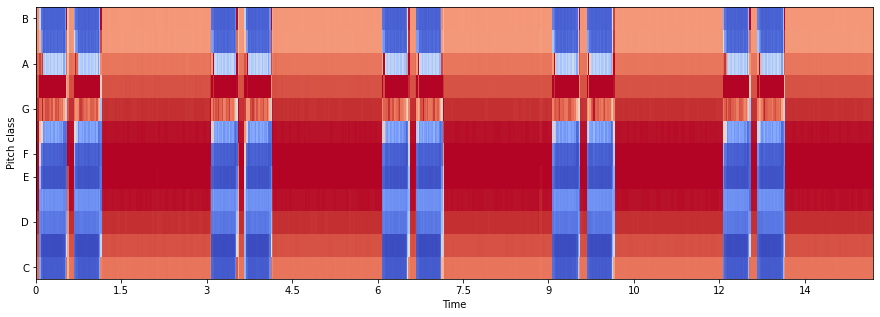

In [131]:
# Loadign the file
x, sr = librosa.load(audio_path)
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [140]:
len(mfccs)

20

# Feature extraction for all Tring Tring

## Saving in CSV

In [275]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [276]:
audio_path_base = 'Dataset/TringTring'
audio_paths = []
files = os.listdir(audio_path_base)
files.remove('.ipynb_checkpoints')
for path in files:
    audio_paths.append(os.path.join(audio_path_base, path))
audio_paths

['Dataset/TringTring/7.mp3',
 'Dataset/TringTring/6.mp3',
 'Dataset/TringTring/4.mp3',
 'Dataset/TringTring/5.mp3',
 'Dataset/TringTring/1.mp3',
 'Dataset/TringTring/2.mp3',
 'Dataset/TringTring/3.mp3',
 'Dataset/TringTring/21.mp3',
 'Dataset/TringTring/20.mp3',
 'Dataset/TringTring/18.mp3',
 'Dataset/TringTring/19.mp3',
 'Dataset/TringTring/17.mp3',
 'Dataset/TringTring/16.mp3',
 'Dataset/TringTring/14.mp3',
 'Dataset/TringTring/15.mp3',
 'Dataset/TringTring/11.mp3',
 'Dataset/TringTring/10.mp3',
 'Dataset/TringTring/12.mp3',
 'Dataset/TringTring/13.mp3',
 'Dataset/TringTring/23.wav',
 'Dataset/TringTring/22.wav',
 'Dataset/TringTring/8.mp3',
 'Dataset/TringTring/9.mp3']

In [277]:
file = open('TringTring.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
    

for filename in audio_paths:
    songname = filename
    y, sr = librosa.load(songname, mono=True, duration=30)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' TringTring'
    file = open('TringTring.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

/Users/mayank.gupta/venv/audio/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/mayank.gupta/venv/audio/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/mayank.gupta/venv/audio/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/mayank.gupta/venv/audio/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/mayank.gupta/venv/audio/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn

## Getting conversation data with Music

In [182]:
audio_path_base_conv = 'Dataset/CallWithMusic'
audio_paths_conv = []
for path in os.listdir(audio_path_base_conv):
    audio_paths_conv.append(os.path.join(audio_path_base_conv, path))
audio_paths_conv

['Dataset/CallWithMusic/music.wav', 'Dataset/CallWithMusic/music1.wav']

In [211]:
x , sr = librosa.load(audio_paths_conv[0], sr=44100)

ipd.Audio(audio_paths_conv[0])

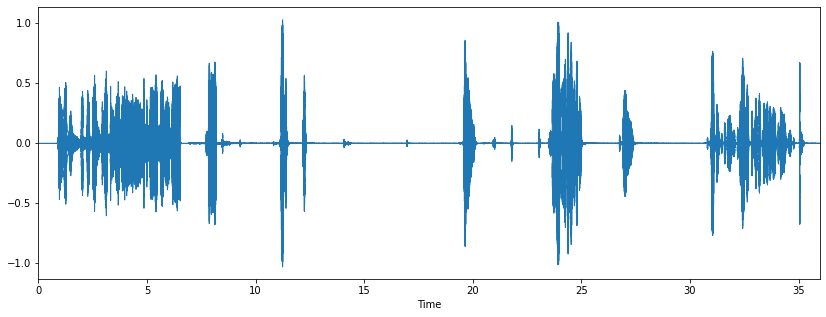

In [207]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

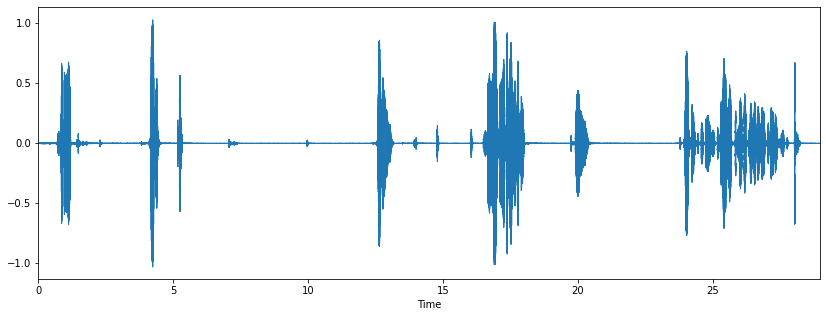

In [208]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x[7*44100:,], sr=sr)

In [210]:
librosa.output.write_wav('Dataset/ConversationWithoutTune/1.wav', x[7*44100:,], sr)

In [213]:
x , sr = librosa.load(audio_paths_conv[1], sr=44100)

ipd.Audio(audio_paths_conv[1])

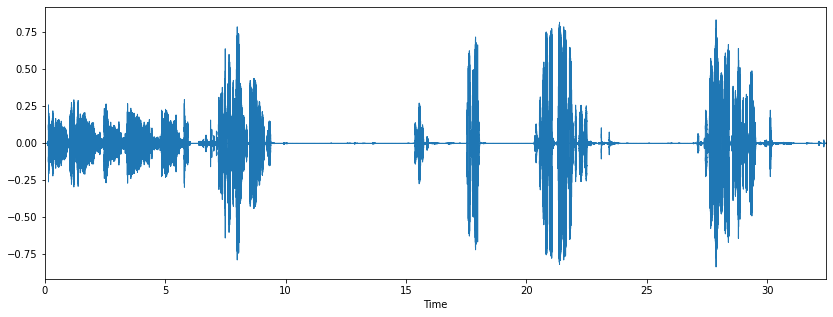

In [214]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

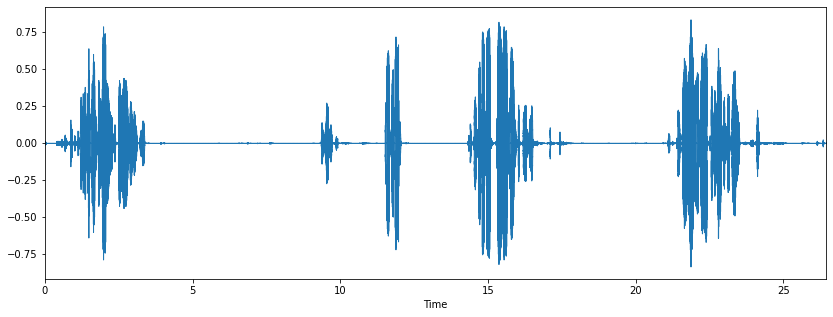

In [216]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x[6*44100:,], sr=sr)

In [217]:
librosa.output.write_wav('Dataset/ConversationWithoutTune/2.wav', x[6*44100:,], sr)

## Getting Converstaion data with Tring Tring

In [249]:
audio_path_base_conv = 'Dataset/CallWithoutMusic'
audio_paths_conv = []
for path in os.listdir(audio_path_base_conv):
    audio_paths_conv.append(os.path.join(audio_path_base_conv, path))
audio_paths_conv

['Dataset/CallWithoutMusic/tring tring.wav',
 'Dataset/CallWithoutMusic/tring tring1.wav']

In [250]:
x , sr = librosa.load(audio_paths_conv[0], sr=44100)

ipd.Audio(audio_paths_conv[0])

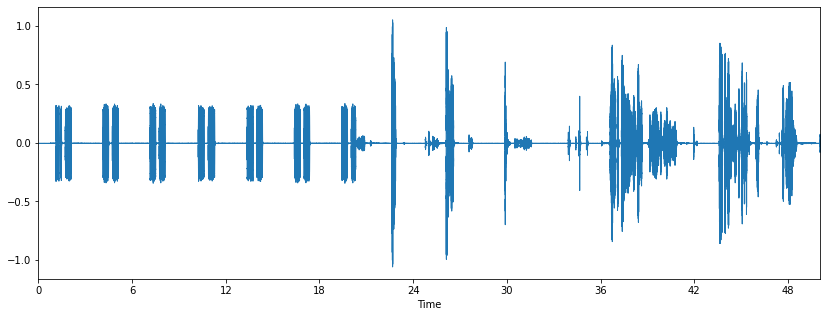

In [251]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

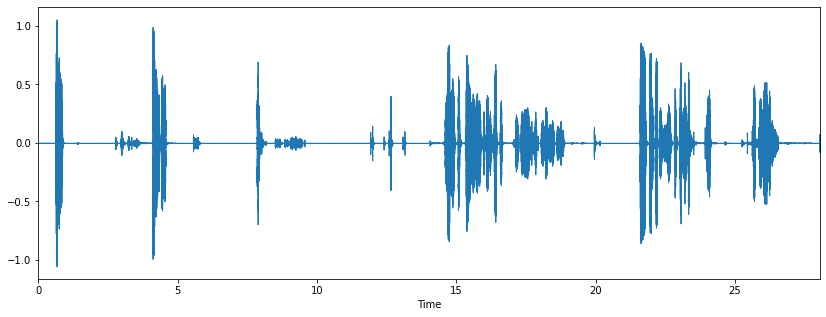

In [252]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x[22*44100:,], sr=sr)

In [253]:
librosa.output.write_wav('Dataset/ConversationWithoutTune/3.wav', x[22*44100:,], sr)
librosa.output.write_wav('Dataset/TringTring/15.wav', x[:22*44100,], sr)

In [254]:
x , sr = librosa.load(audio_paths_conv[1], sr=44100)

ipd.Audio(audio_paths_conv[])

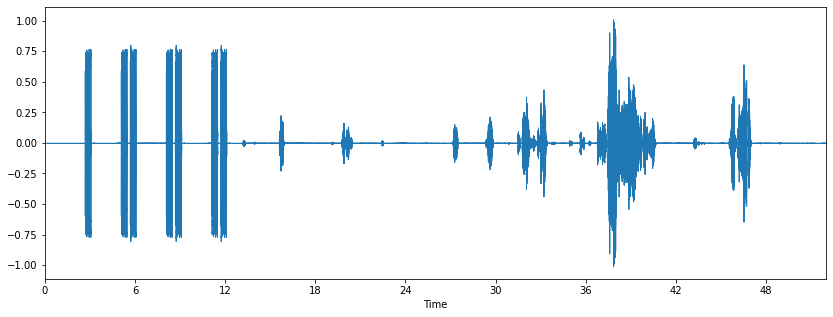

In [255]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

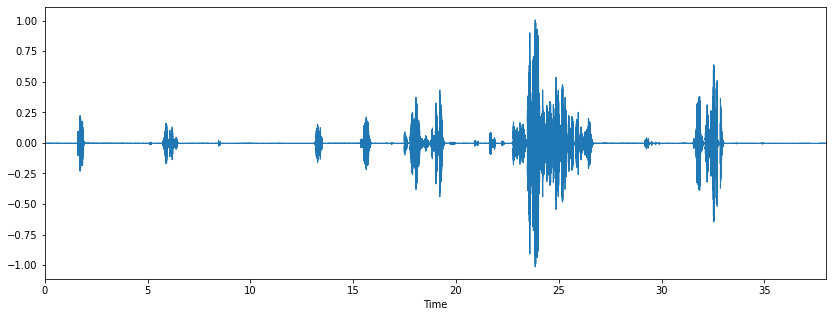

In [256]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x[14*44100:,], sr=sr)

In [257]:
librosa.output.write_wav('Dataset/ConversationWithoutTune/4.wav', x[14*44100:,], sr)
librosa.output.write_wav('Dataset/TringTring/16.wav', x[:14*44100,], sr)

## Splitting conversation data to create more data

In [261]:
base_path = 'Dataset/ConversationWithoutTune'
for file in os.listdir(base_path):
    x , sr = librosa.load(os.path.join(base_path, file), sr=44100)
    file_len = len(x)
    # Split in 3 parts:
    split_len = int(file_len/3)
    print(split_len)
    # First part = 0 to split_len
    # Second part = split_len to split_len*2
    # 3rd Part = split_len*2 to -1
    file_name = file.split('/')[-1].split('.')[0]
    librosa.output.write_wav(f'{base_path}/{file_name}-1.wav', x[:split_len,], sr)
    librosa.output.write_wav(f'{base_path}/{file_name}-2.wav', x[split_len:split_len*2,], sr)
    librosa.output.write_wav(f'{base_path}/{file_name}-3.wav', x[split_len*2:,], sr)
    
    

558574
425877
412127
388837


## Feature extraction of conversation data

In [273]:
conversation_files_base_path = 'Dataset/ConversationWithoutTune'
conversation_files = os.listdir(conversation_files_base_path)
# conversation_files.remove('ipynb_checkpoints')
conversation_files = [f'{conversation_files_base_path}/{x}' for x in conversation_files]
conversation_files

['Dataset/ConversationWithoutTune/3-1.wav',
 'Dataset/ConversationWithoutTune/1-3.wav',
 'Dataset/ConversationWithoutTune/1-2.wav',
 'Dataset/ConversationWithoutTune/3-2.wav',
 'Dataset/ConversationWithoutTune/1-1.wav',
 'Dataset/ConversationWithoutTune/3-3.wav',
 'Dataset/ConversationWithoutTune/4.wav',
 'Dataset/ConversationWithoutTune/1.wav',
 'Dataset/ConversationWithoutTune/3.wav',
 'Dataset/ConversationWithoutTune/2.wav',
 'Dataset/ConversationWithoutTune/2-2.wav',
 'Dataset/ConversationWithoutTune/2-3.wav',
 'Dataset/ConversationWithoutTune/2-1.wav',
 'Dataset/ConversationWithoutTune/4-2.wav',
 'Dataset/ConversationWithoutTune/4-3.wav',
 'Dataset/ConversationWithoutTune/4-1.wav']

In [274]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [278]:
file = open('Talk.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
    

for filename in conversation_files:
    songname = filename
    y, sr = librosa.load(songname, mono=True, duration=30)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' Talk'
    file = open('Talk.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())